In [29]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import re
from konlpy.tag import Komoran
import numpy as np
import gensim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

driver = webdriver.Chrome()

driver.get("https://www.aitimes.kr/news/articleList.html?sc_section_code=S1N5&view_type=sm")
 
type2 = driver.find_element(By.CLASS_NAME, "type2")
links = type2.find_elements(By.CLASS_NAME, 'thumb')

list = []
for l in links:
    list.append(l.get_attribute("href"))

driver.close()
print("done")

done


In [83]:
train = []
from bs4 import BeautifulSoup
import requests

for i in list:
    response = requests.get(i)
    soup = BeautifulSoup(response.text, "html.parser")
    s = soup.select('#article-view-content-div > p')
    for i in s:
        train.append(i.text)
print("done")

done


In [6]:
for i, e in enumerate(train):
    cle1 = re.sub("[\n\r\']", '', re.sub(r'\xa0', ' ', e))
    cle2 = re.sub("[^0-9A-Za-z가-힣\s.]", '', re.sub("\([^)]*\)", " ", cle1))
    train[i] = cle2
print("done")

done


In [7]:
with open("stopword.txt", 'r', encoding='UTF8') as f:
    stopwords = f.read().split()
print("done")

done


In [8]:
train_s = []
for i in train:
    for s in i.split("."):
        if s.strip() != '':
            train_s.append(str(s).strip())
print("done")

done


In [11]:
komoran = Komoran()
train_w = []
for i in train_s:
    train_w.append(komoran.nouns(i))
print("done")

done


In [21]:
train_dsw = []
for s in train_w:
    l = []
    for w in s:
        if w not in stopwords:
            l.append(w)
    train_dsw.append(l)
print("done")

done


In [30]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=train_dsw, vector_size=100, window=5, min_count=5, workers=4, sg=0)
print("done")

done


In [32]:
model.wv.save_word2vec_format('ko_w2v')
print("done")

done


In [33]:
loaded_model = KeyedVectors.load_word2vec_format("ko_w2v")
print("done")

done


In [65]:
embedding_dim = 100
zero_vector = np.zeros(embedding_dim)
print("done")

done


In [37]:
def calculate_sentence_vector(sentence, model):
    word_vectors = [model[word] for word in sentence if word in model]

    if word_vectors:
        sentence_vector = sum(word_vectors) / len(word_vectors)
    else:
        sentence_vector = np.zeros(model.vector_size)
    
    return sentence_vector

print("done")

done


In [77]:
from bs4 import BeautifulSoup
import requests

links = []
response = requests.get('https://www.aitimes.kr/news/articleList.html?sc_sub_section_code=S2N3&view_type=sm')
soup = BeautifulSoup(response.text, "html.parser")
s = soup.select("#section-list > ul > li")
for i in s:
    links.append("https://www.aitimes.kr" + i.select_one("a").get("href"))
print("done")

done


In [87]:
test = []
for i in links:
    response = requests.get(i)
    soup = BeautifulSoup(response.text, "html.parser")
    s = soup.select('#article-view-content-div > p')
    te = ''
    for t in s:
        te += t.text + " "
    test.append(te)
print("done")

done


In [112]:
for i, e in enumerate(test):
    tcl1 = re.sub("[\n\r\']", '', re.sub(r'\xa0', ' ', e))
    tcl2 = re.sub("[^0-9A-Za-z가-힣\s.]", '', re.sub("\([^)]*\)", " ", tcl1))
    test[i] = tcl2
    
test_s = []
for i in test:
    test_sl = []
    for s in i.split("."):
        if s.strip() != '':
            test_sl.append(str(s).strip())
    test_s.append(test_sl)

komoran = Komoran()
test_w = []
for i in test_s:
    test_wl = []
    for j in i:
        test_wl.append(komoran.nouns(j))
    test_w.append(test_wl)

test_dsw = []
for s in test_w:
    new_sentences = []  # 현재 문장의 수정된 버전을 저장할 리스트
    for sentence in s:
        new_words = []  # 현재 문장의 수정된 버전을 저장할 리스트
        for word in sentence:
            if word not in stopwords:
                new_words.append(word)
        new_sentences.append(new_words)  # 수정된 문장을 추가
    test_dsw.append(new_sentences)
    
print("done")

done


In [115]:
p_list = []
for i in test_dsw:
    p = [calculate_sentence_vector(t, loaded_model) for t in i]
    p_list.append(p)
print("done")

done


In [145]:
sim_mat_list = []

for p in p_list:
    sim_mat = np.zeros([len(p), len(p)])
    for i in range(len(p)):
        for j in range(len(p)):
            sim_mat[i][j] = cosine_similarity(p[i].reshape(1, embedding_dim),
                                              p[j].reshape(1, embedding_dim))[0,0]
    sim_mat_list.append(sim_mat)
print("done")

done


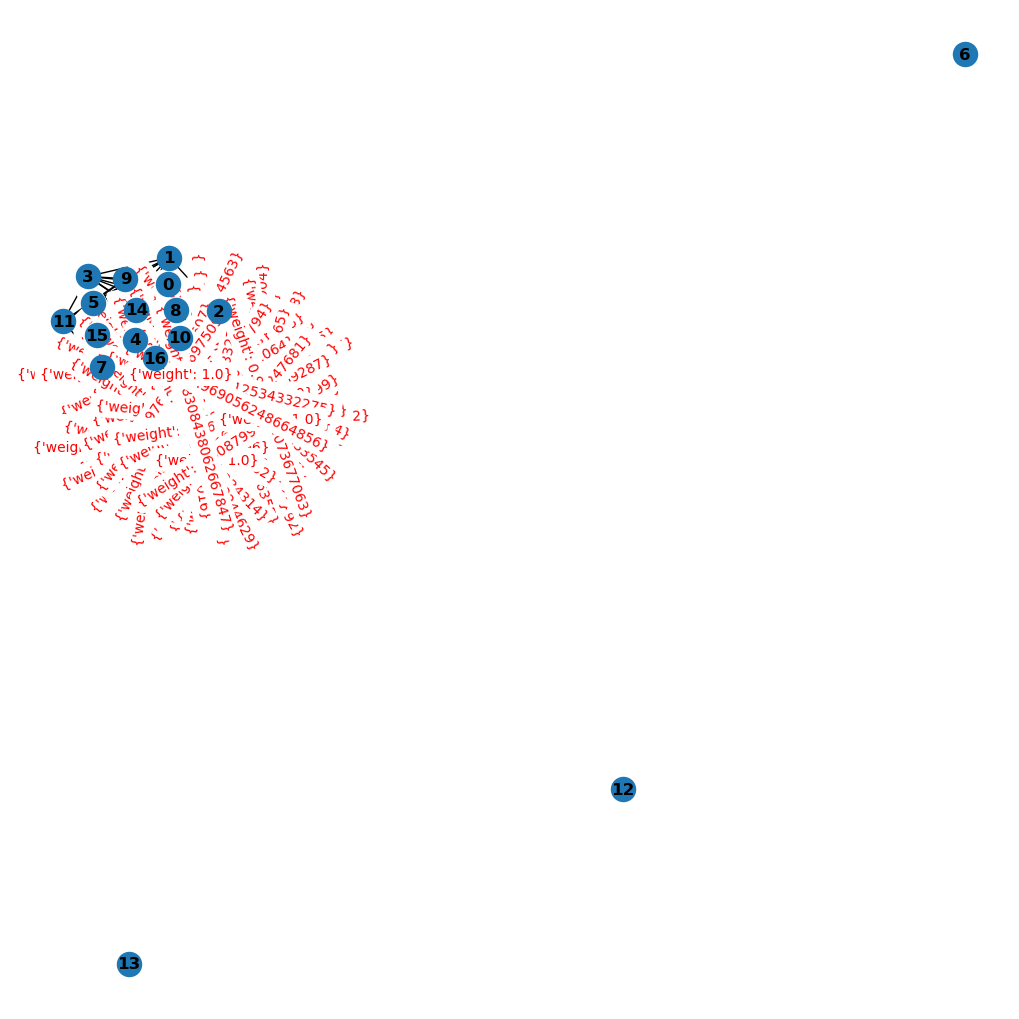

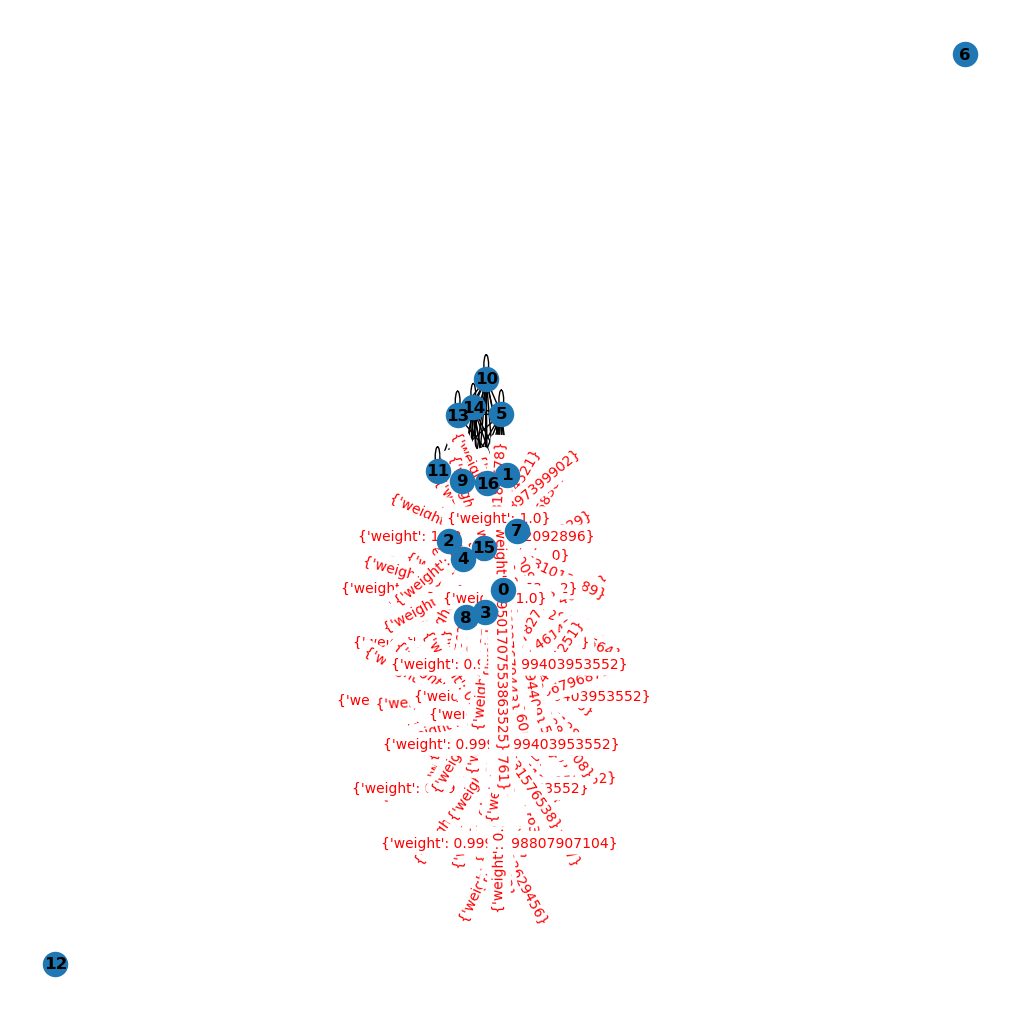

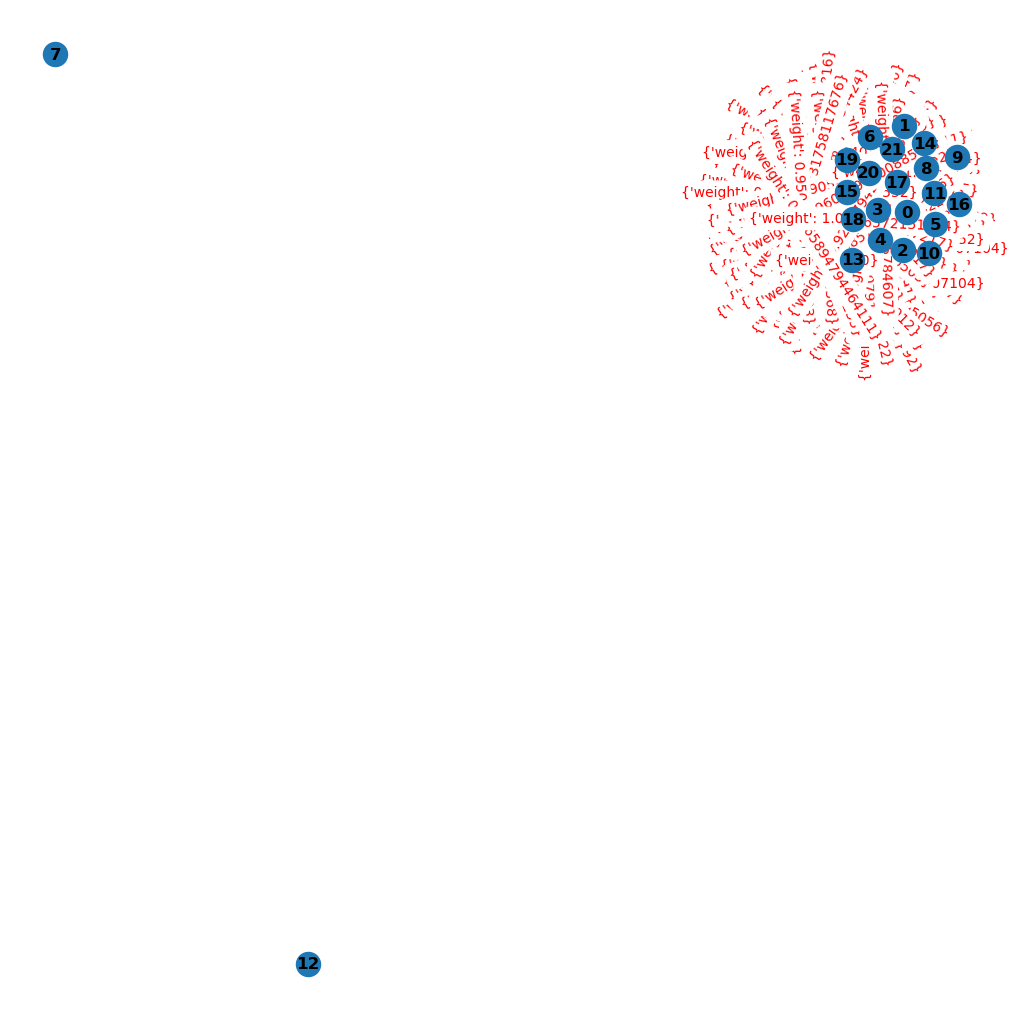

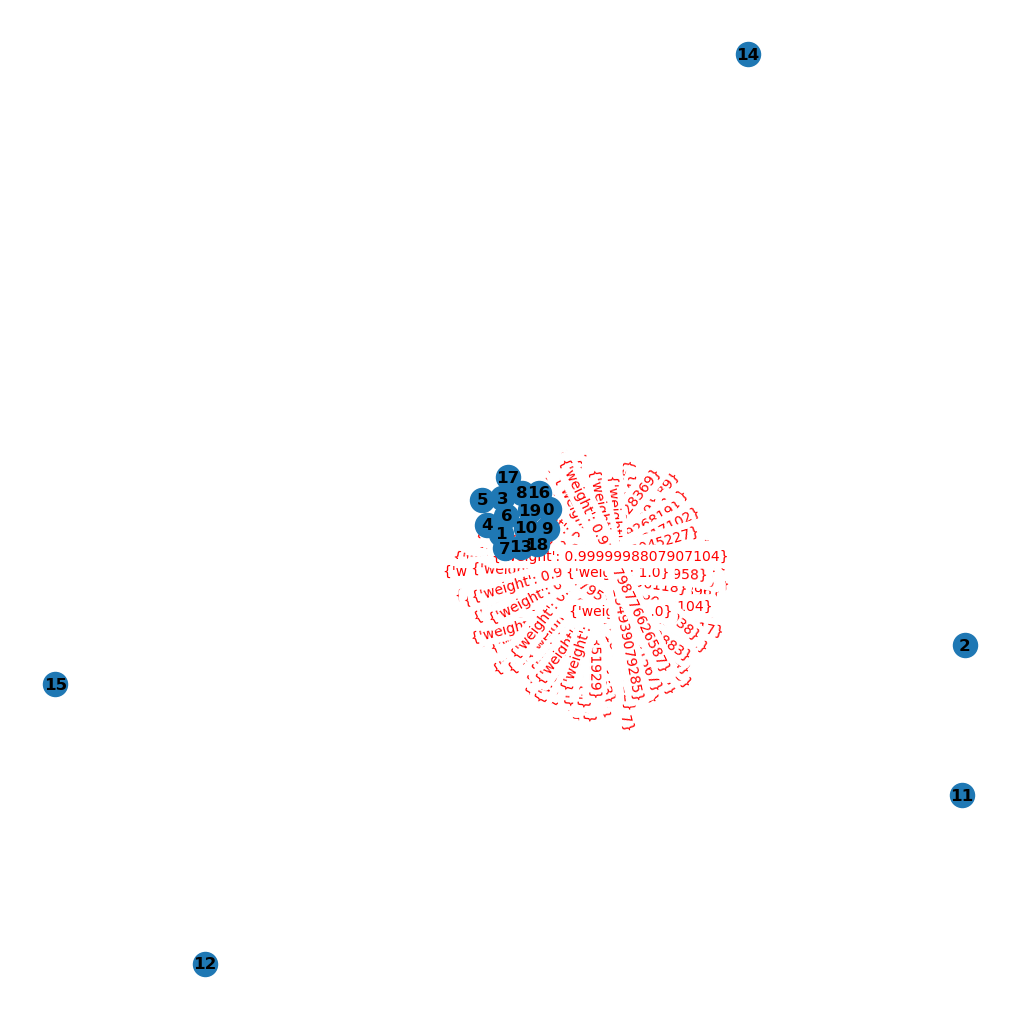

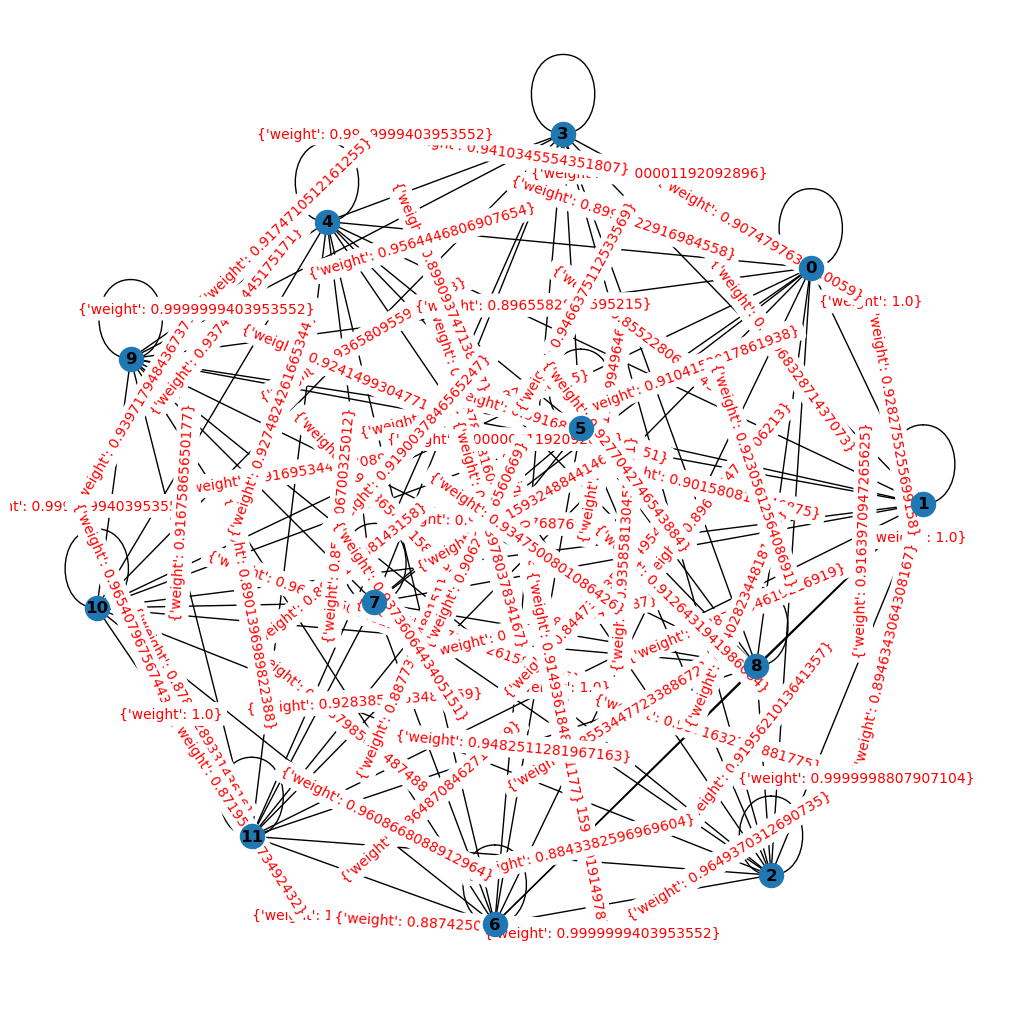

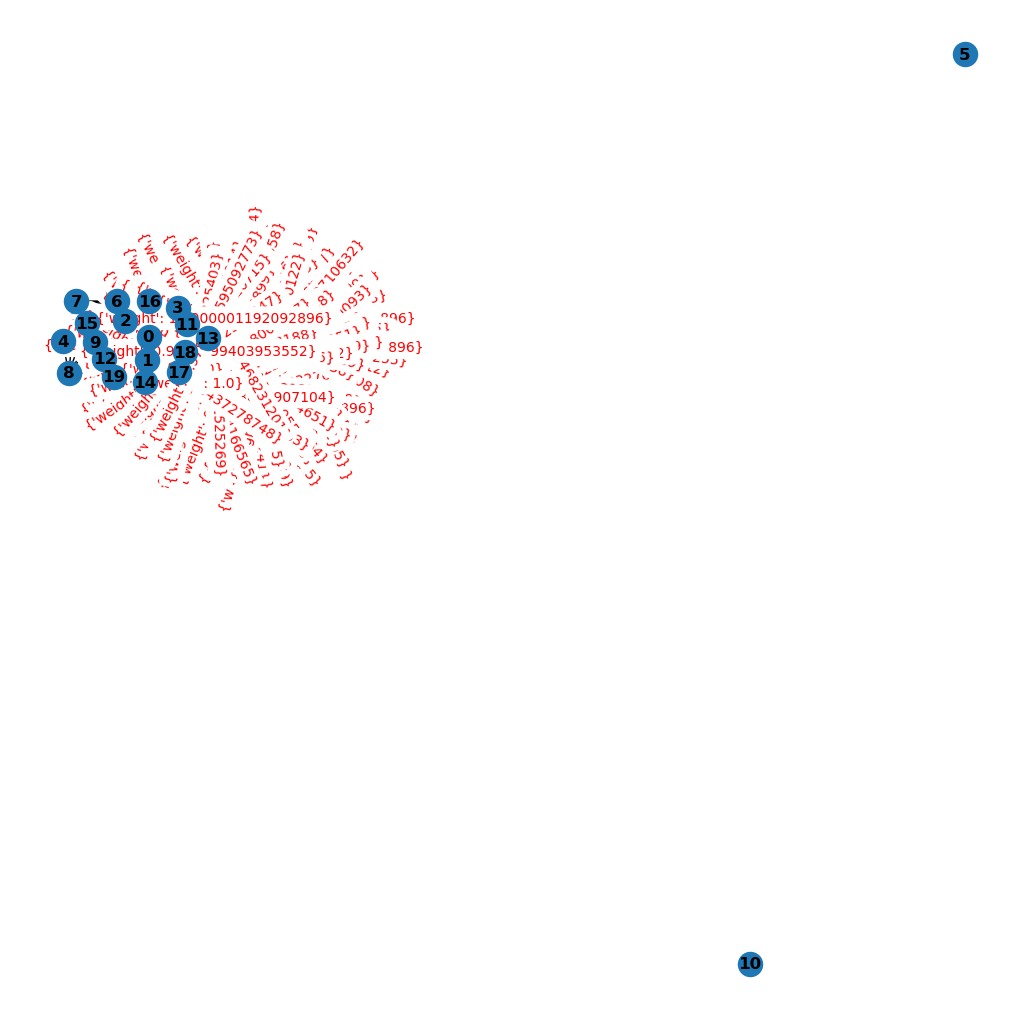

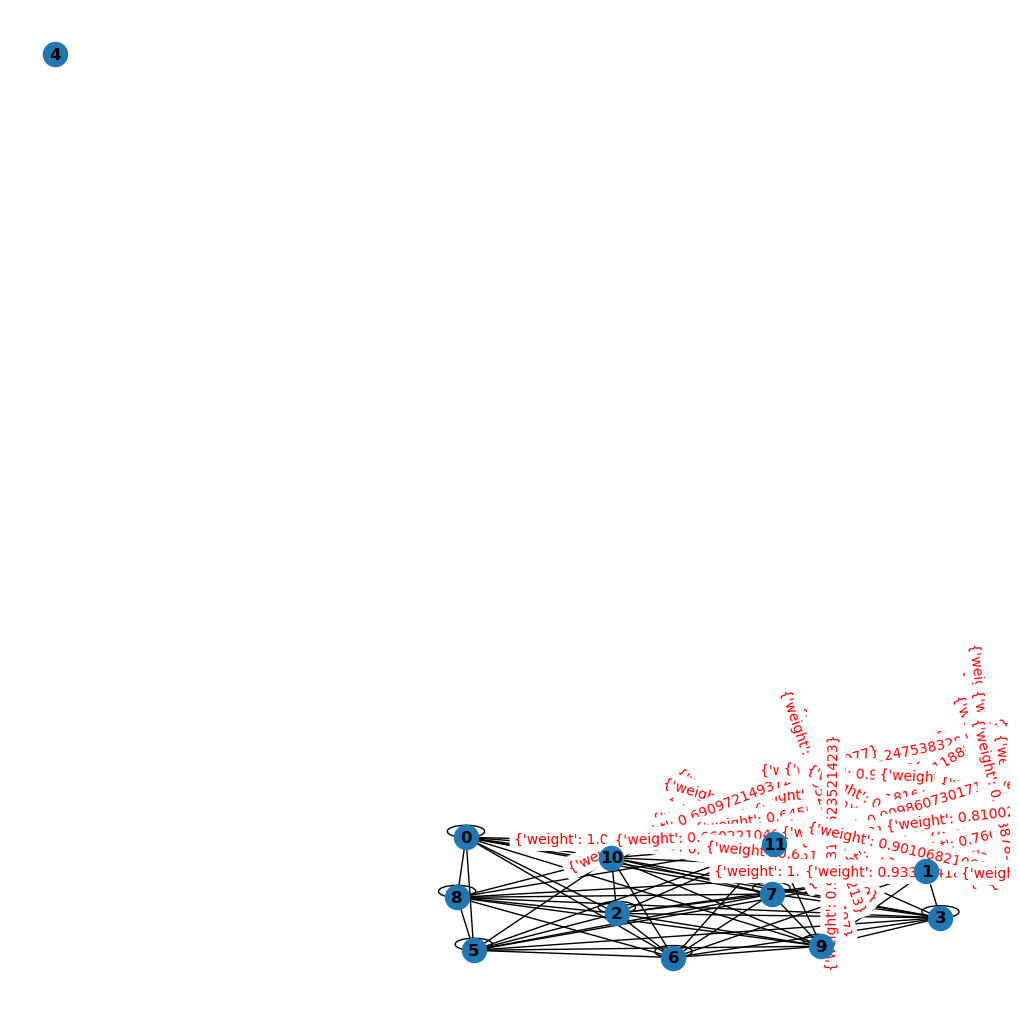

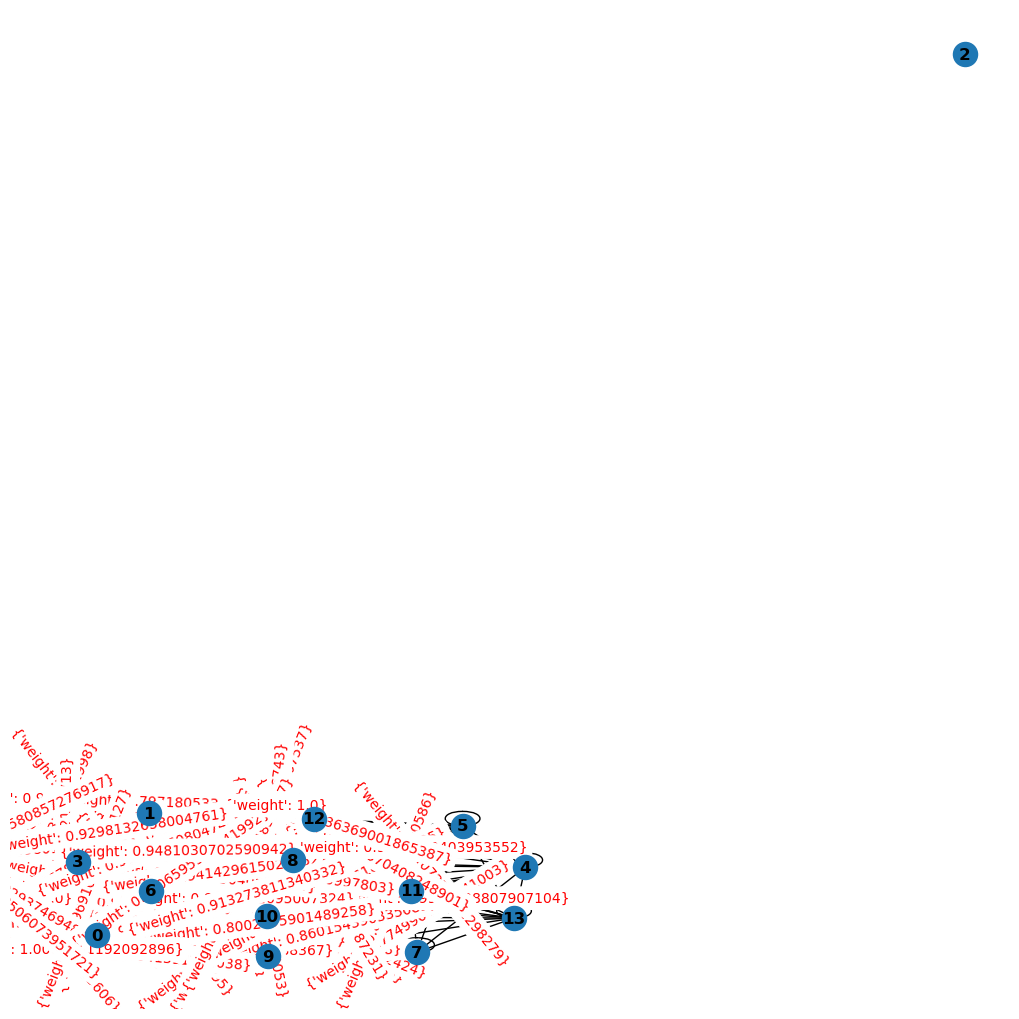

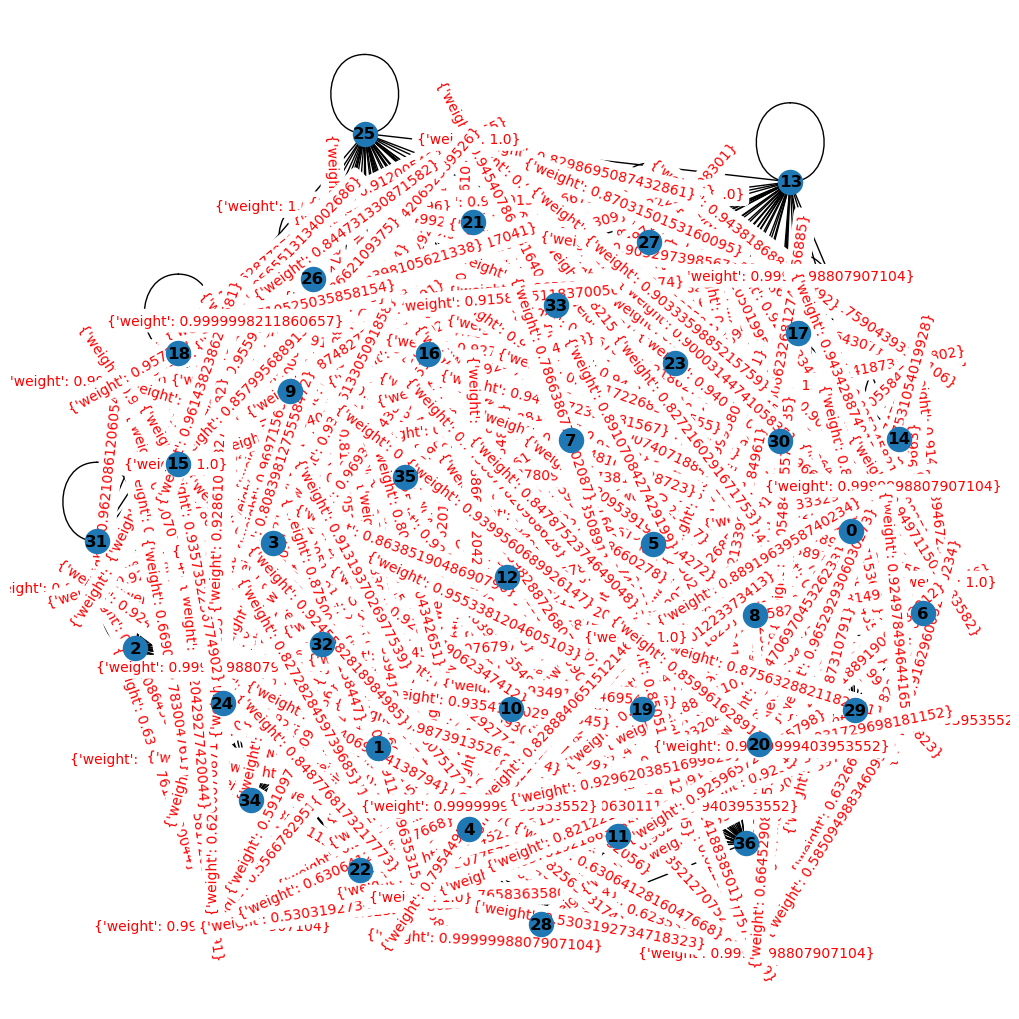

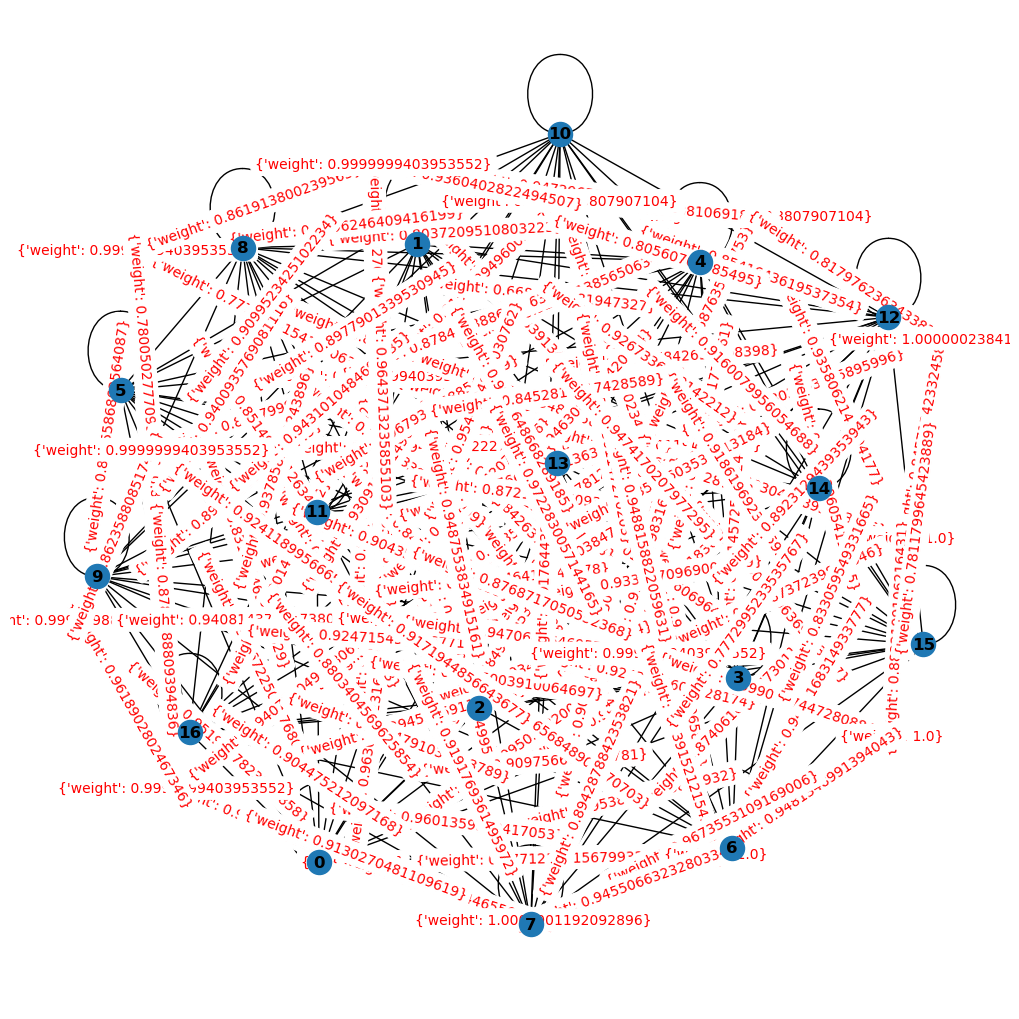

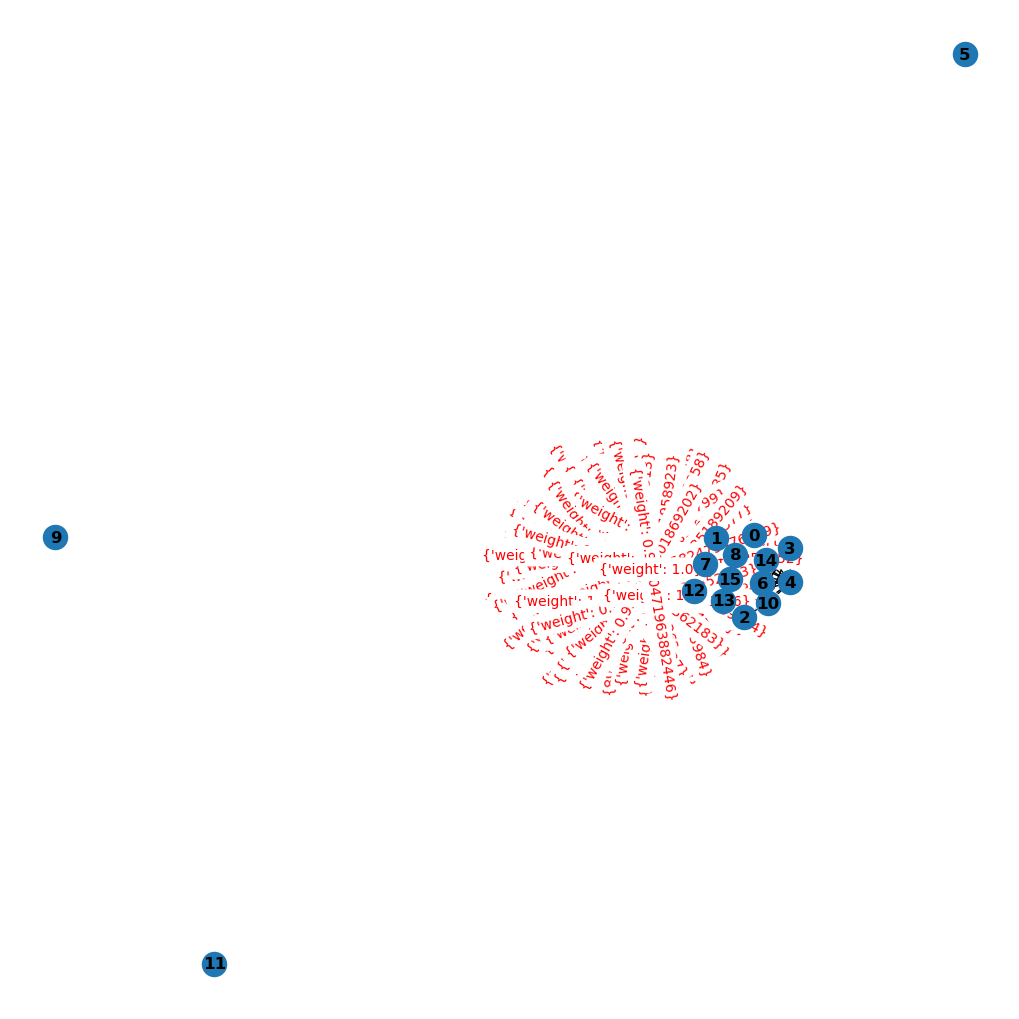

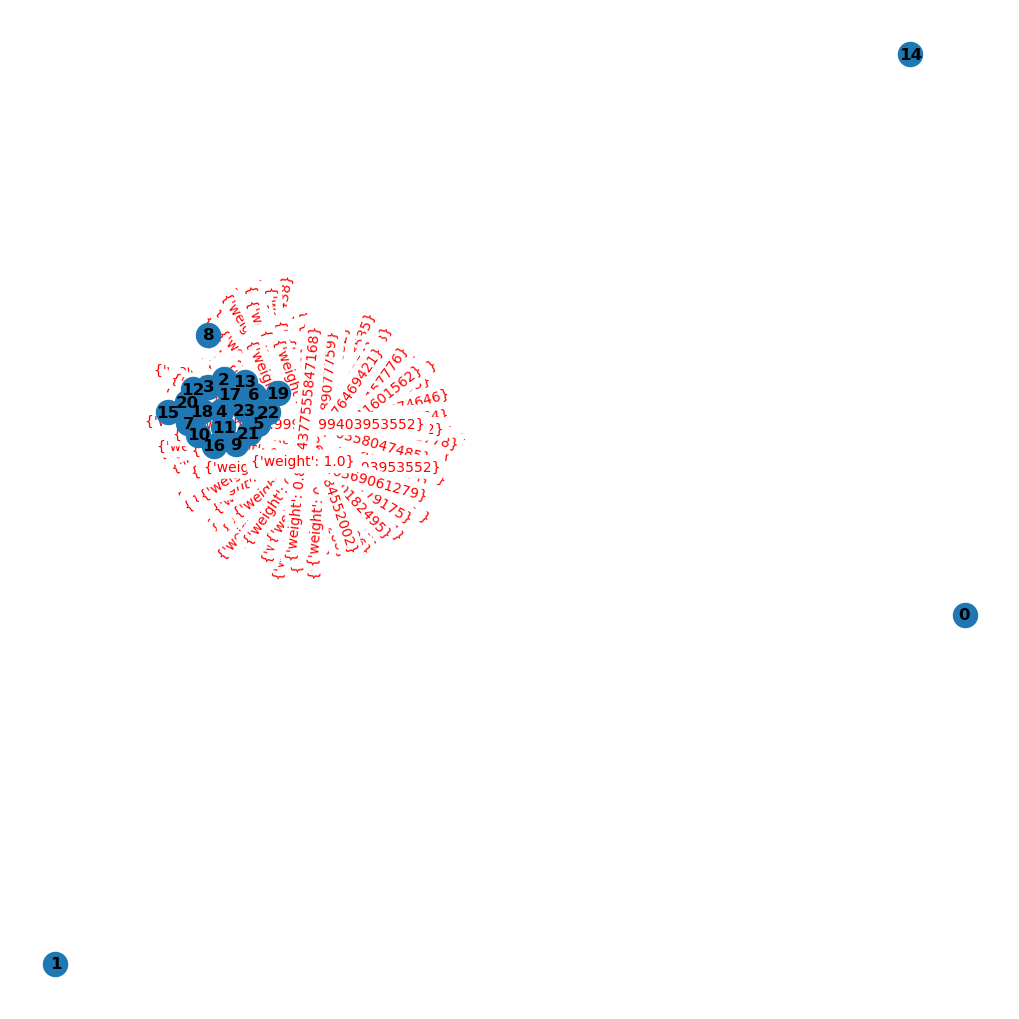

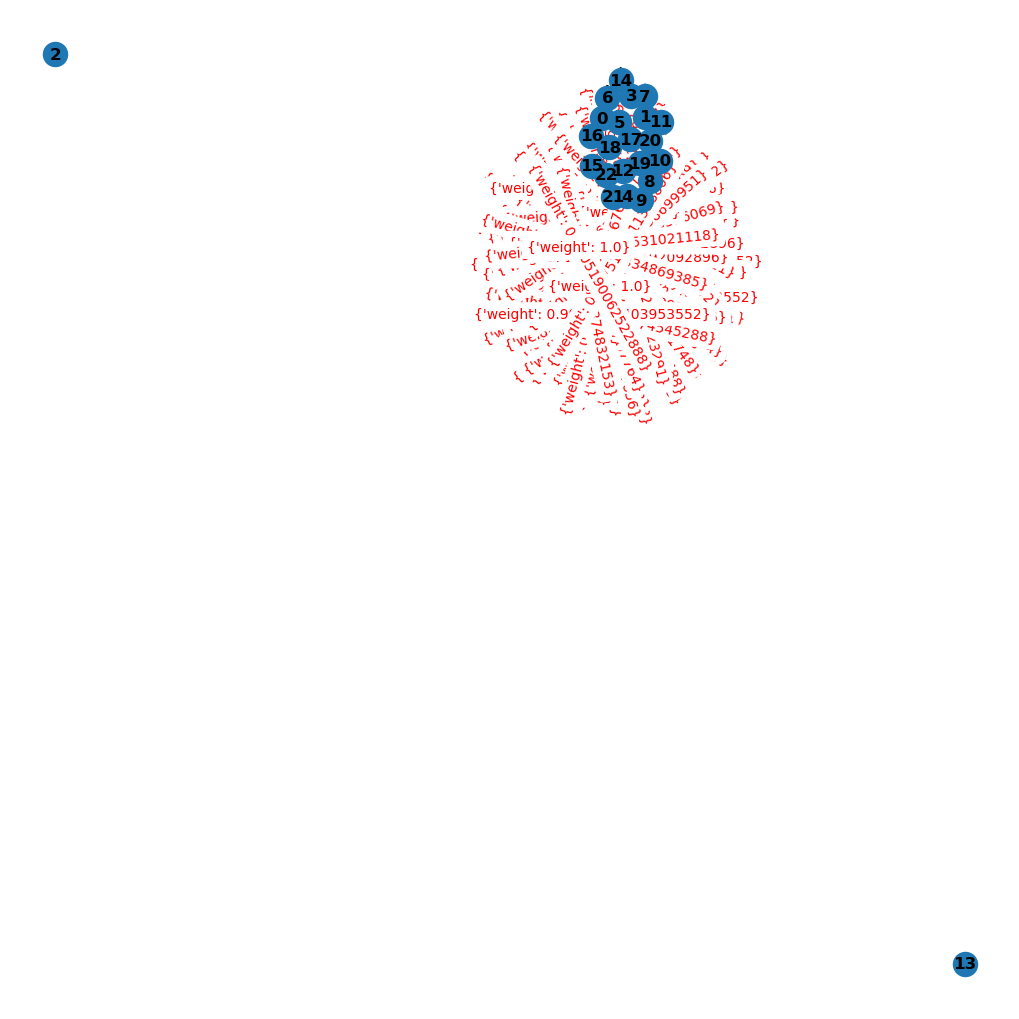

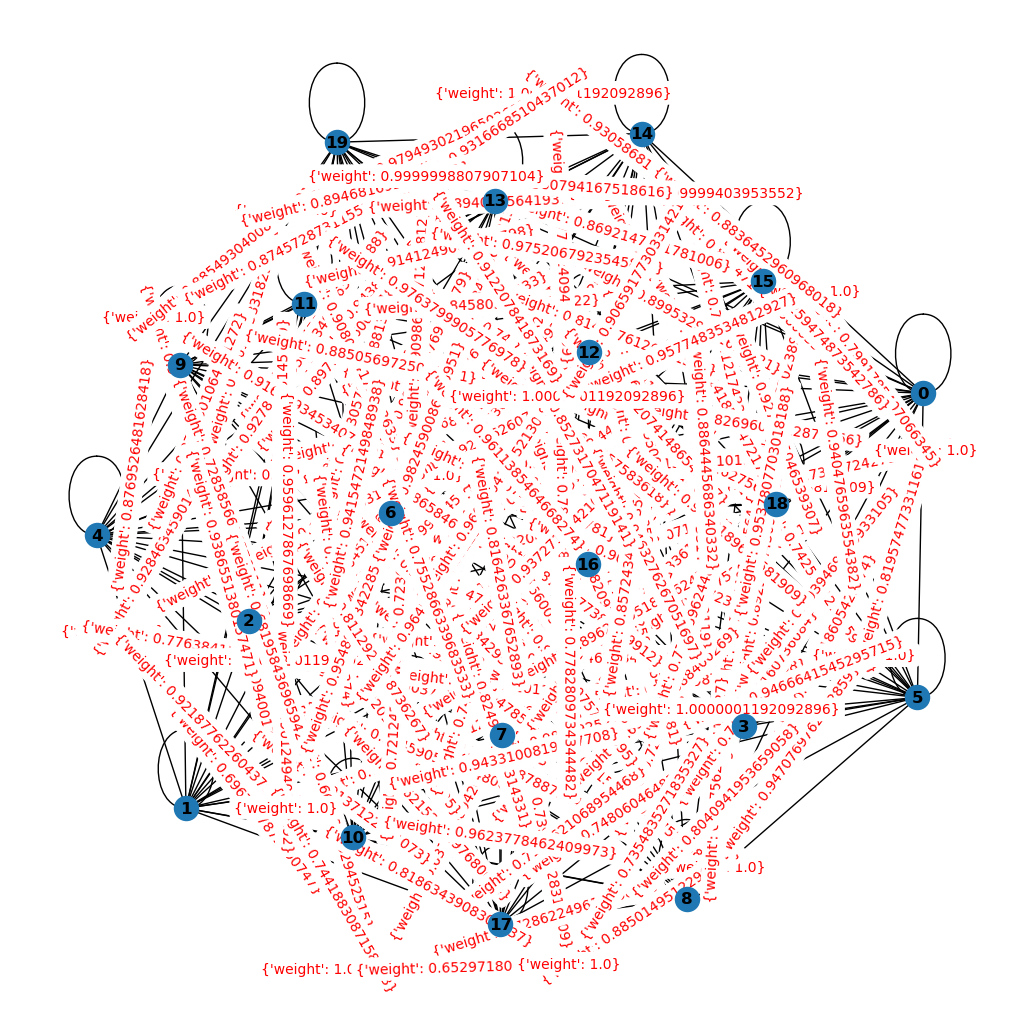

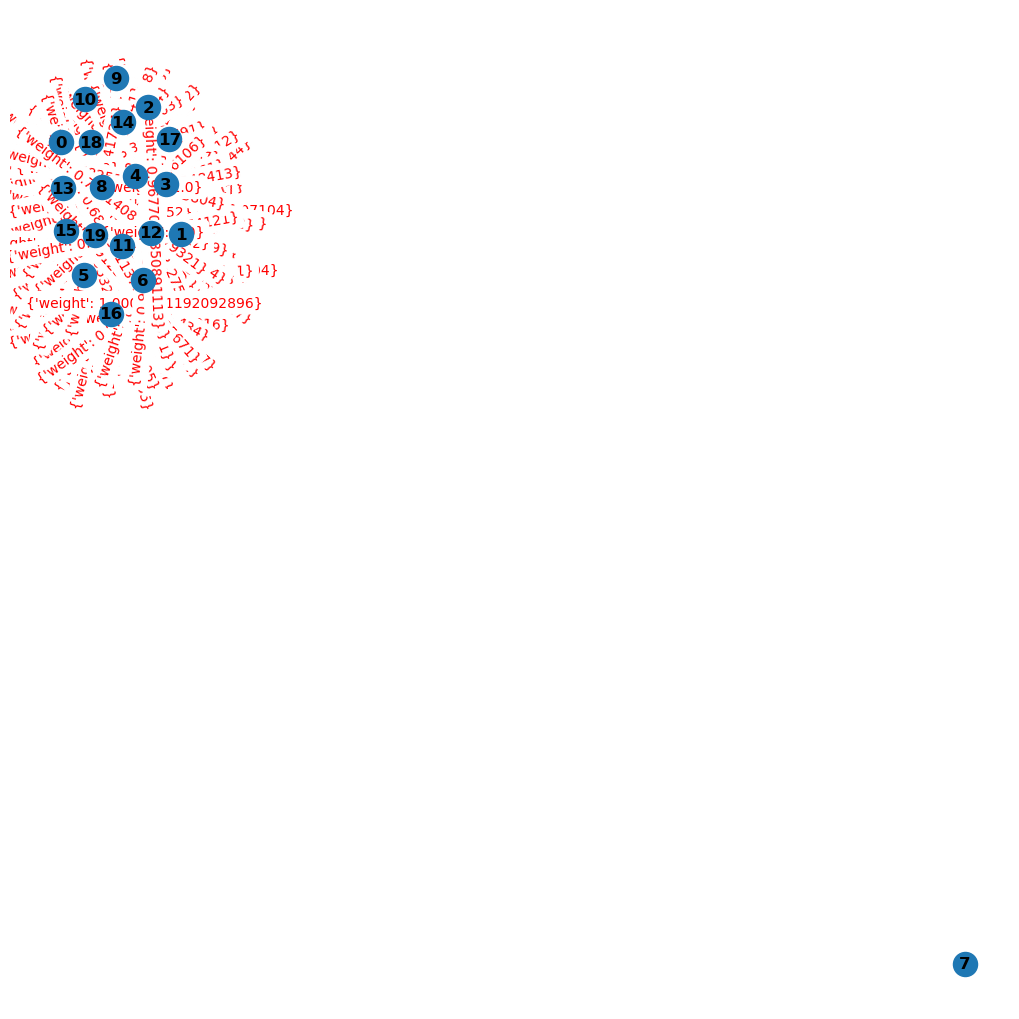

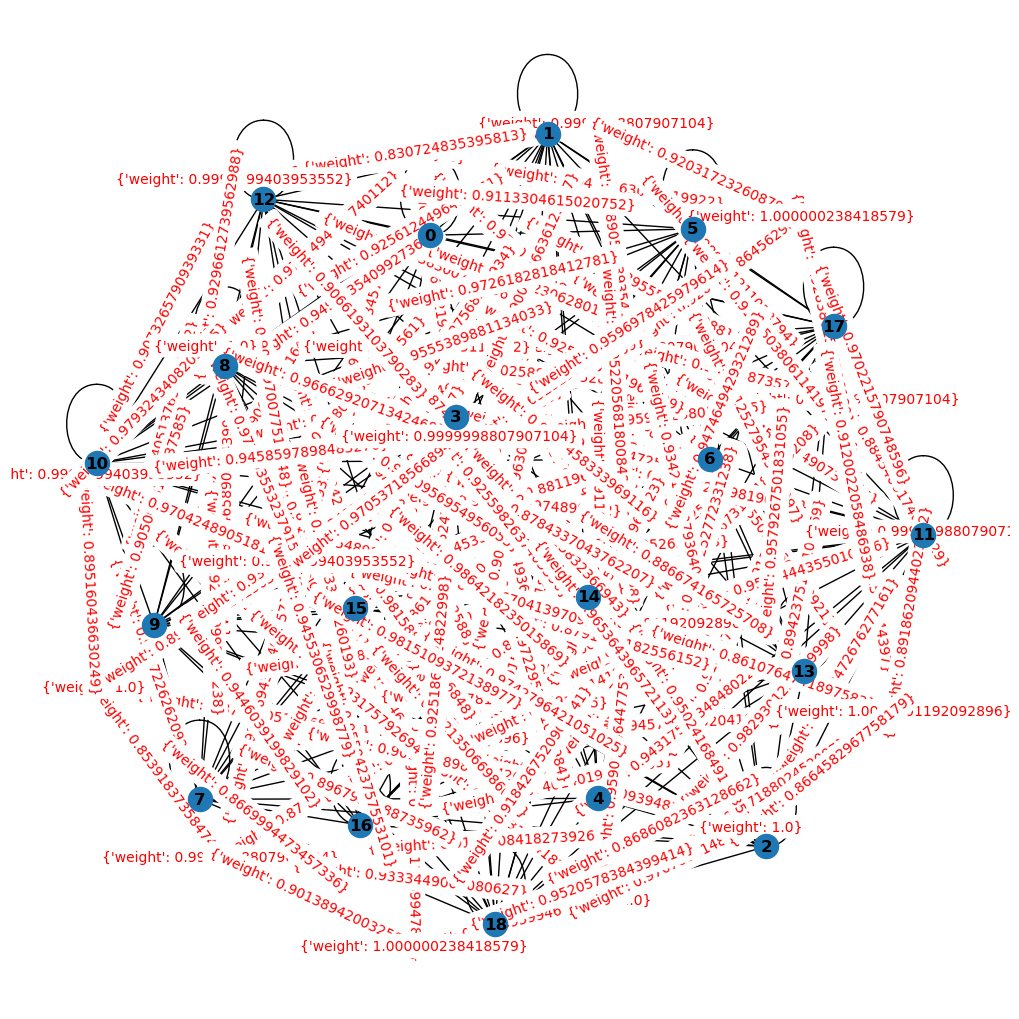

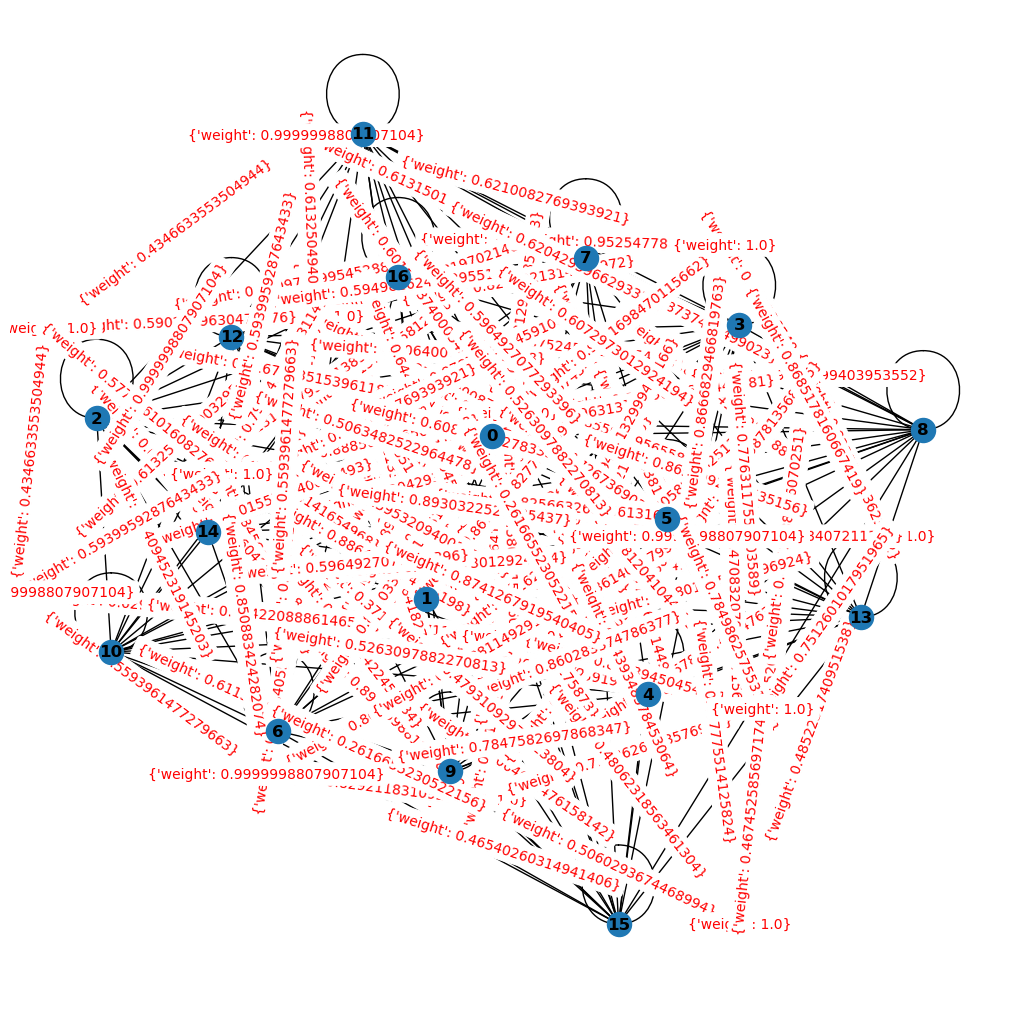

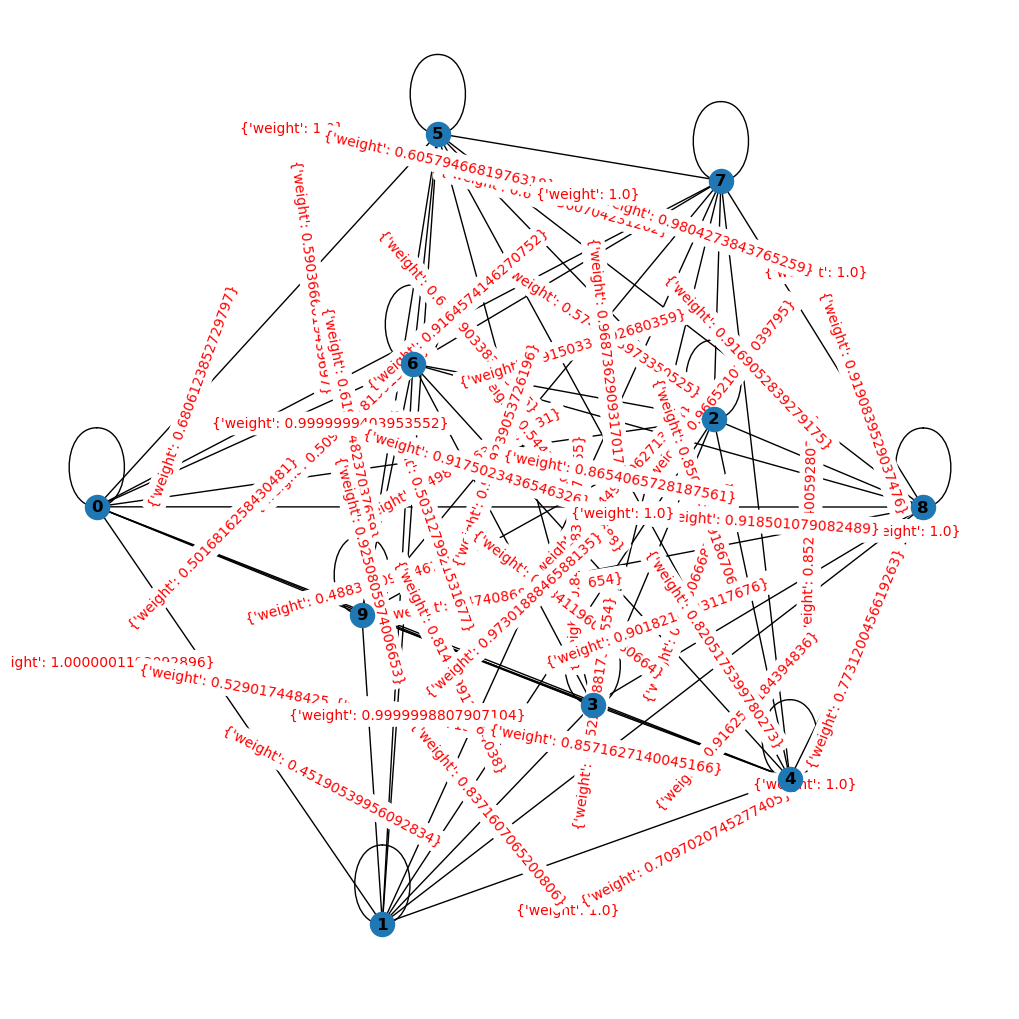

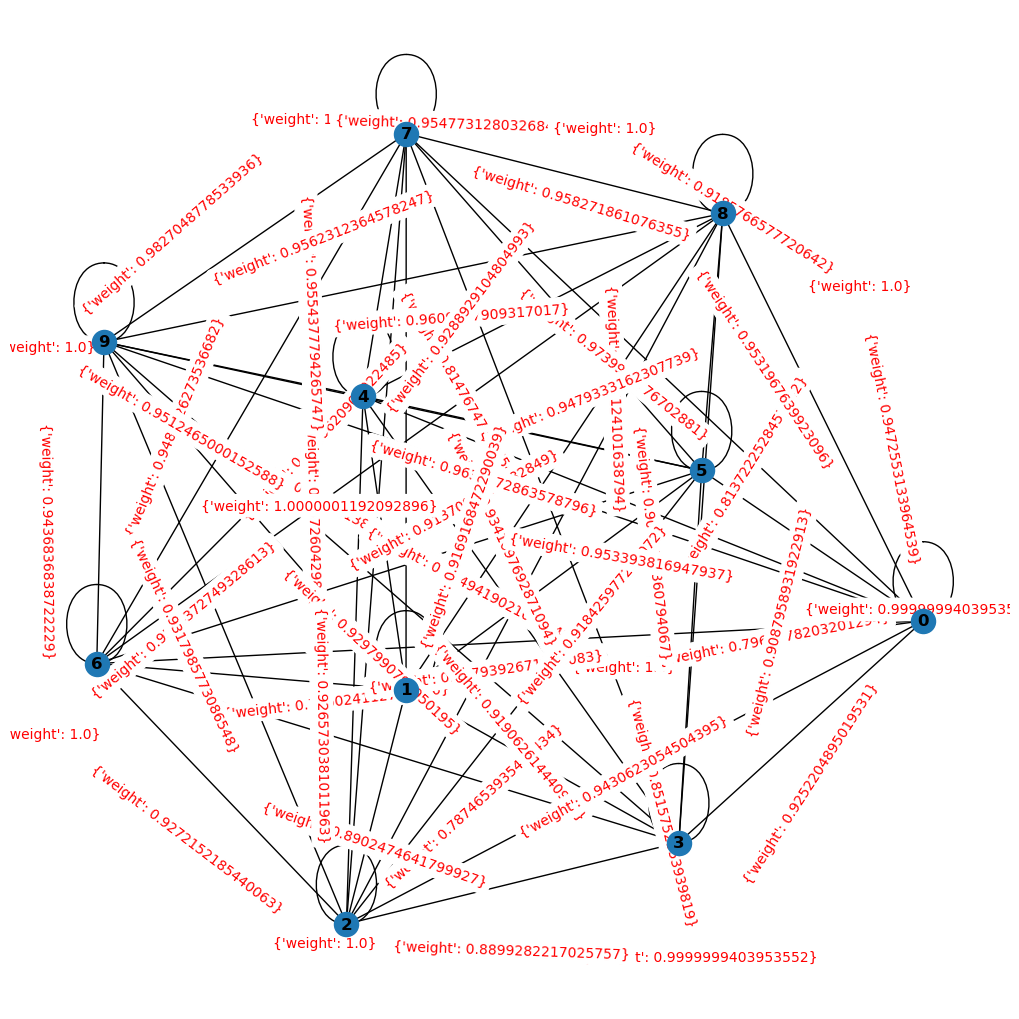

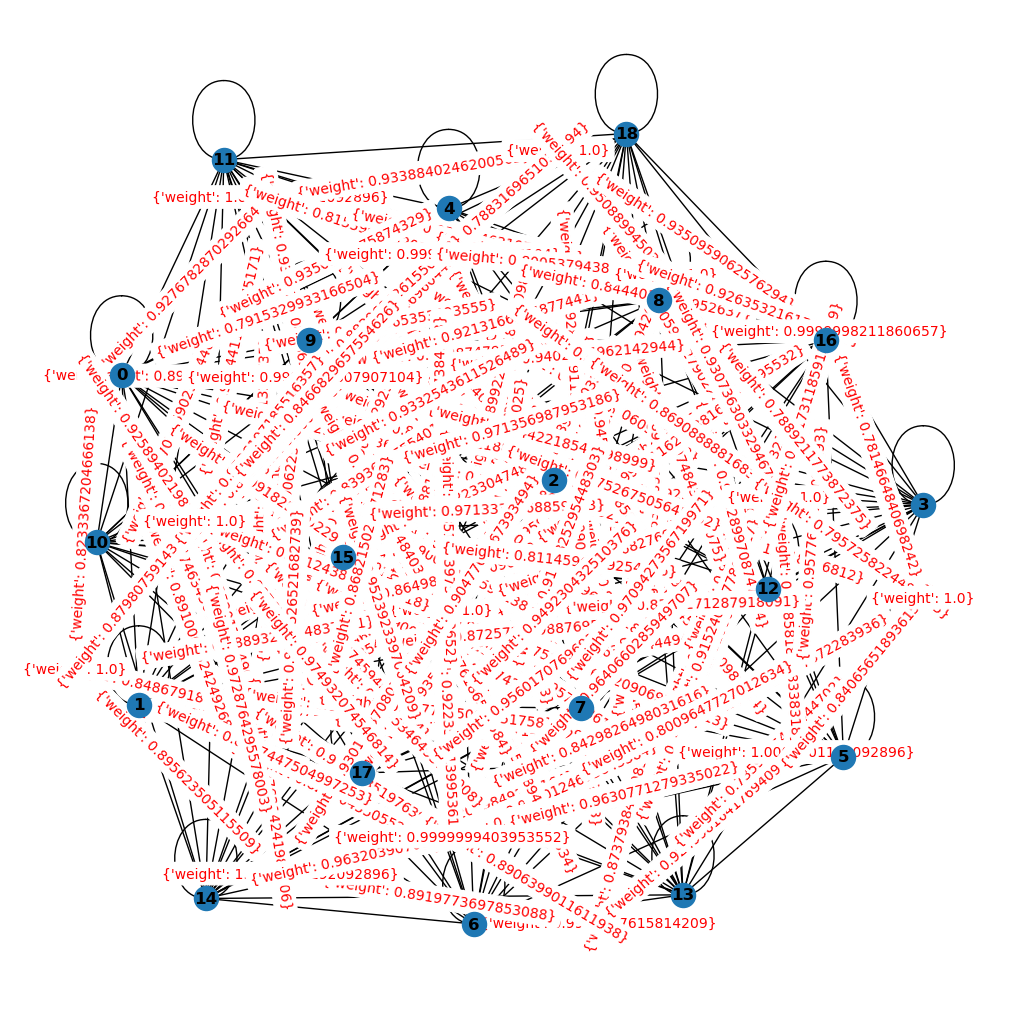

In [147]:
def draw_graphs(sim_matrix):
    nx_graph = nx.from_numpy_array(sim_matrix)
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
    plt.show()

for i in sim_mat_list:
    draw_graphs(i)

In [168]:
for i in test:
    print(i, '\n')

미숙아들은 출생 후 호흡기가 제대로 기능하지 못해 호흡곤란이나 무호흡 등이 발생하는 경우가 많고 출산 시기가 이를수록 이러한 위험에 노출될 가능성이 높아진다. 이때는 정상적으로 자가 호흡이 가능할 때까지 기도 삽관 후 인공호흡기를 사용하게 된다. 이러한 인공호흡기는 가능하다면 최소한의 기간만 사용하고 발관 하는 것이 좋다. 인공호흡기를 통해 숨을 쉬는 기간이 필요 이상으로 길어질수록 폐가 정상적으로 성장하지 못할 가능성이 높아지기 때문이다. 실제로 장기간의 기도 삽관 및 인공호흡기 사용은 미숙아의 기관지폐이형성증 위험을 높이고 신경 발달도 지연시키는 것으로 알려져 있다. 반대로 발관이 너무 이르게 이뤄질 경우 저산소증과 고이산화탄소혈증이 발생해 뇌에 안 좋은 영향을 끼칠 수 있고 마찬가지로 기관지폐이형성증의 발생 위험이 증가할 수 있다. 너무 늦지도 이르지도 않은 최적의 발관 시점을 정해야 한다는 의미다. 그러나 현재는 이에 대해 명확히 합의된 지침이 없어 주치의의 판단에 의존하고 있는데 1000g 미만의 미숙아에서 발관 후 이를 유지하는 데 성공할 확률은 평균 6073 수준으로 보고되고 있다. 이에 기도 삽관 후 인공호흡기를 사용하는 미숙아의 인공호흡 장치를 제거하는 발관  시점을 결정하는 데 도움을 주는 인공지능 모델이 국내 의료진에 의해 개발됐다. 분당서울대병원 고위험산모신생아통합치료센터 정영화최창원 교수  디지털헬스케어연구사업부 유수영 교수 송원근 연구원 등 연구팀은 기도 삽관 후 인공호흡기를 사용하는 미숙아의 발관 성공률을 평가하는 모델을 개발했다. 연구팀은 2003년부터 2019년까지 분당서울대병원에서 태어난 32주 미만의 미숙아 중 기도 삽관 후 침습적 인공호흡기를 사용한 678명의 데이터를 활용 심장박동호흡 등의 생체 신호를 분석해 발관 성공 여부를 예측하는 인공지능  머신러닝  알고리즘을 개발했다. NExtPredictor라는 명칭의 이 발관성공 예측모델은 정확도를 나타내는 곡선하면적  0.805 정밀도 는 0.917 수준으로 매우 뛰어난 예측

In [166]:
def calculate_score(sim_matrix):
    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank(nx_graph)
    return scores


for i, e in enumerate(sim_mat_list):
    s = ''
    score = calculate_score(e)
    d = sorted(score.items(), key=lambda x: x[1], reverse=True)
    wc = [j[0] for j in d]
    c = wc[:3]
    for n in c:
        s += test_s[i][n] + ". "
    print(s, '\n')

연구팀은 2003년부터 2019년까지 분당서울대병원에서 태어난 32주 미만의 미숙아 중 기도 삽관 후 침습적 인공호흡기를 사용한 678명의 데이터를 활용 심장박동호흡 등의 생체 신호를 분석해 발관 성공 여부를 예측하는 인공지능  머신러닝  알고리즘을 개발했다. 분당서울대병원 고위험산모신생아통합치료센터 정영화 교수는 인공호흡기를 쓰는 미숙아는 빨라도 늦어도 안 되는 최적의 시점에 인공호흡기를 떼는 것이 중요하다며 그러나 이에 대한 정확한 기준을 마련하는 데 어려움이 있었던 만큼 발관 성공 가능성을 예측해주는 인공지능이 의료 현장에서 큰 도움이 될 것이라 판단해 개발하게 됐다고 밝혔다. 이에 기도 삽관 후 인공호흡기를 사용하는 미숙아의 인공호흡 장치를 제거하는 발관  시점을 결정하는 데 도움을 주는 인공지능 모델이 국내 의료진에 의해 개발됐다.  

공동연구팀은 촉매 표면에서 흡착 물질이 결합하는 에너지를 정확하게 예측하기 위해 SGCNN  인공지능 모델을 개발했다. KIST 김동훈 박사는 향후 양질의 흡착에너지 데이터를 지속해서 구축해 더욱 정교한 인공지능 모델링을 수행할 계획이며 이는 촉매 소재 개발의 성공률을 더욱 향상시킬 것이라고 기대했다. 한편 이번 연구성과는 삼성전자 삼성미래기술육성사업 및 과학기술정보통신부의 소재연구데이터플랫폼사업 지원으로 수행되었으며 한국에너지기술연구원 박영태 박사후 연구원과 한국과학기술연구원 물질구조제어연구센터 황창규 연수생  이 공동 제1저자로 참여하여 국제 학술지 Applied Catalysis B Environmental에 연료 전지를 위한 방대한 삼원계 합금 공간에서 효율적인 전기 촉매를 걸러내는 머신러닝 란 제목으로 지난 7월 24일 게재됐다.  

최민이 교수는 이번 연구는 실험실에서 얻은 생물학적 데이터를 인공지능에 효과적으로 학습시켜 정확도가 높은 질병 하위 유형 분류 모델을 생성하는 방법을 구체적으로 소개했다며 이 플랫폼은 자폐 스펙트럼과 같이 환자 개인별 증상이 뚜렷하게 다른 뇌 질환의 하위 유형을 분류하는 데에도